# ML Course 3 - Practice

## Subject

**`FuelConsumption.csv`** is a vehicle fuel consumption data set that contains model-specific fuel consumption.
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

In [2]:
data = pd.read_csv("FuelConsumption.csv")

In [3]:
data.sample(6)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
343,2014,FORD,E150 VAN FFV,VAN - CARGO,4.6,8,A4,X,17.7,14.4,16.2,17,373
689,2014,MASERATI,GHIBLI AWD,MID-SIZE,3.0,6,AS8,Z,15.2,9.6,12.7,22,292
613,2014,KIA,OPTIMA,MID-SIZE,2.0,4,A6,X,11.7,7.6,9.9,29,228
73,2014,BENTLEY,CONTINENTAL GTC,SUBCOMPACT,6.0,12,AS8,Z,20.0,12.2,16.5,17,380
274,2014,CHRYSLER,300,FULL-SIZE,3.6,6,A8,X,12.4,7.7,10.3,27,237
1024,2014,VOLKSWAGEN,BEETLE TDI CLEAN DIESEL,COMPACT,2.0,4,A6,D,8.2,6.1,7.3,39,197


1. Compute the correlation value between the CO2 emission and the engine size. Do you think that the engine size can be taken as a unique predictor for the CO2 emission? 
2. Plot the CO2 emission with respect to the engine size. Do you think that a linear regression model would fit well here?
3. Train a linear regression model for the prediction of the CO2 emission based exclusively on the engine size (do not forget the train-test split).
4. What are the parameters of the regression line? If an engine size is increased by 1 L, what would be the CO2 emission increase as predicted by your model? 
5. Plot the regression line over the data.
6. Plot the distribution of the residuals (i.e. the error terms).
7. Evaluate the performance of the model (MSE, RMSE, MAE, $R^2$).
8. Can you calculate those same performance metrics for an untrained regression model where the intercept and the coefficient would be both 0? Are you surprised by the measured performance?
9. Train a linear regression model for the prediction of the CO2 emission now based exclusively on the combined fuel consumption (FUELCONSUMPTION_COMB) and evaluate its performance. Compare with the metrics computed in question 7 (the model trained on the engine size). What can you conclude?
* Now make a "dummy" model that simply predicts the mean CO2, regardless of the input engine size. Can you plot the regression line of such a model and calculate its performance? How does the performance compare to the the other models'? Can you explain why?  

__HINT__: as you will be performing the same operations multiple times on different data sets with different variables, you might want to wrap some pieces of code in functions in order to be able to reuse it easily in different places of your notebook!

## 1.Correlation between the CO2 emission and the engine size

In [4]:
correlation = data['CO2EMISSIONS'].corr(data['ENGINESIZE'])
correlation

0.8741543683958121

I think that the engine size can be taken as a unique predictor for the CO2 emission. Because according to the correlation value. CO2 emisssions will be more with engine size increasing.

## 2.linear regression model between the CO2 emission and the engine size

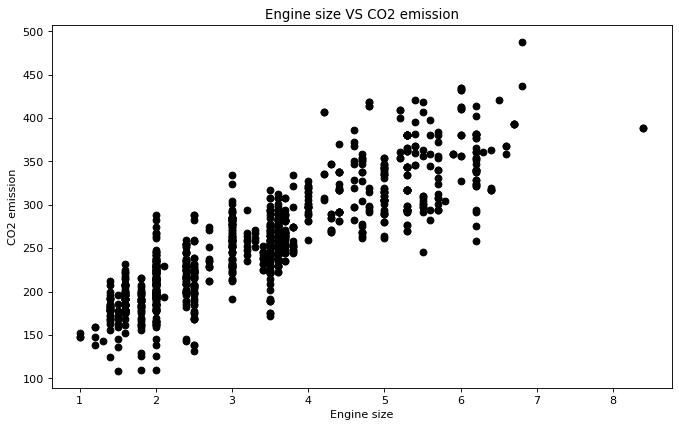

In [5]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'], c='black')
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")
plt.title("Engine size VS CO2 emission")
plt.show()

According to the plot, we can see there is a clear trend there must be a linear regression model would fit well here.

## 3.Train a linear regression model for the prediction of the CO2 emission based exclusively on the engine size 

### Check for missing data

In [6]:
data[['ENGINESIZE', 'CO2EMISSIONS']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ENGINESIZE    1067 non-null   float64
 1   CO2EMISSIONS  1067 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 16.8 KB


### Data preparation and Linear regression fitting

In [7]:
x = data[['ENGINESIZE']]
y = data['CO2EMISSIONS']
x.shape, y.shape

((1067, 1), (1067,))

### Linear regression fitting

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
def regression_model(x_train, y_train):
    regressor = LinearRegression()
    return regressor.fit(x_train, y_train)
regressor = regression_model(x, y)

## 4.Linear regression fitting

### The parameters of the model (estimations of beta_0 and beta_1)

In [20]:
print(regressor.intercept_)

125.3040994953569


In [21]:
print(regressor.coef_)

[39.12519979]


According to the coefficient of x, CO2 emission will increase around 39.40 when an engine size is increased by 1 L.

## 5.Plot the regression line over the data.

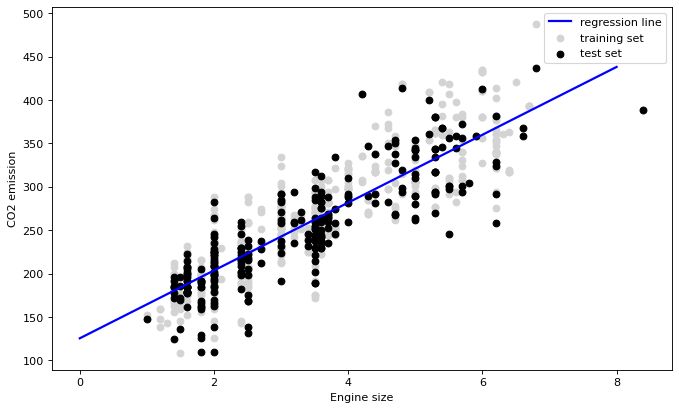

In [47]:
x_plot = np.arange(0,9,1).reshape(-1, 1)
y_plot = regressor.predict(x_plot)

plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(x_train, y_train, c='lightgray', label='training set')
plt.scatter(x_test, y_test, c='black', label='test set')
plt.plot(x_plot, y_plot, c='blue', label='regression line', linewidth=2)
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")
plt.legend()
plt.show()

## 6.Plot the distribution of the residuals

In [24]:
from sklearn.metrics import r2_score,  explained_variance_score
y_pred = regressor.predict(x_test)

print("Variance-score (coefficient of determination): R² = %.2f" % r2_score(y_test , y_pred))

Variance-score (coefficient of determination): R² = 0.73


<AxesSubplot:xlabel='ENGINESIZE', ylabel='residuals'>

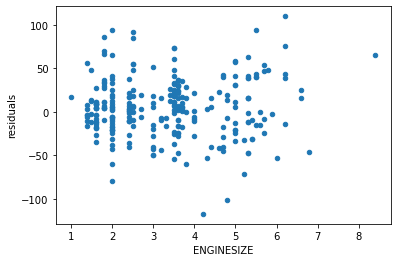

In [26]:
errors = (y_pred - y_test) 
error_plot = x_test.copy()
error_plot['residuals'] = errors
error_plot.plot.scatter(x='ENGINESIZE', y='residuals')

## 7.Evaluate the performance of the model (MSE, RMSE, MAE,  𝑅2 )

In [27]:
def evaluate_performance(x_test, y_test):
    rss = sum(errors ** 2)
    mae = np.mean(abs(errors))
    mse = np.mean(errors ** 2)
    rmse = np.sqrt(mse)

    print(f"Residual sum of squares (RSS): {rss :.2f}")
    print("-"*50)
    print(f"Mean square error (MSE): {mse :.2f}")
    print(f"Root mean square error (RMSE): {rmse :.2f}")
    print(f"Mean absolute error (MAE): {mae :.2f}")

evaluate_performance(x_test, y_test)

Residual sum of squares (RSS): 298532.10
--------------------------------------------------
Mean square error (MSE): 1118.10
Root mean square error (RMSE): 33.44
Mean absolute error (MAE): 25.31


## 8.An untrained regression model where the intercept and the coefficient would be both 0

## 9.Train a linear regression model for the prediction of the CO2 emission based on the combined fuel consumption

In [34]:
x1 = data[['FUELCONSUMPTION_COMB']]
y1 = data['CO2EMISSIONS']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.25, random_state = 0)

regressor1 = regression_model(x1, y1)


In [35]:
y1_pred = regressor.predict(x1_test)
errors = (y1_pred - y1_test) 
evaluate_performance(x1_test, y1_test)

Residual sum of squares (RSS): 28842886.60
--------------------------------------------------
Mean square error (MSE): 108025.79
Root mean square error (RMSE): 328.67
Mean absolute error (MAE): 317.96


Conclusion:

Now make a "dummy" model that simply predicts the mean CO2, regardless of the input engine size. Can you plot the regression line of such a model and calculate its performance? How does the performance compare to the the other models'? Can you explain why?

## 10."dummy" model

In [37]:
x2 = data[['CYLINDERS']]
y2 = data['CO2EMISSIONS']
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.25, random_state = 0)
regressor2 = regression_model(x2, y2)

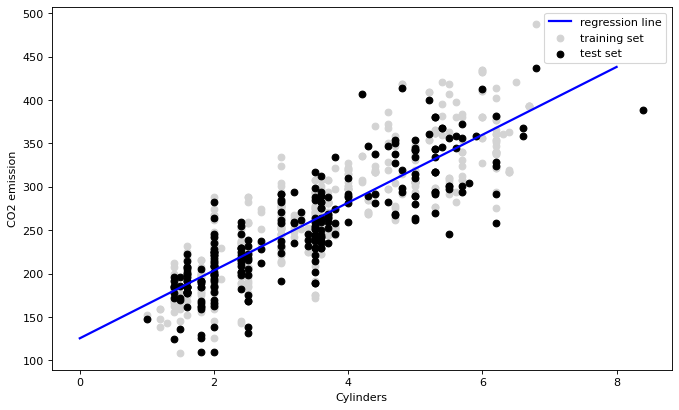

In [46]:
x_plot = np.arange(0,9,1).reshape(-1, 1)
y_plot = regressor.predict(x_plot)

plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(x_train, y_train, c='lightgray', label='training set')
plt.scatter(x_test, y_test, c='black', label='test set')
plt.plot(x_plot, y_plot, c='blue', label='regression line', linewidth=2)
plt.xlabel("Cylinders")
plt.ylabel("CO2 emission")
plt.legend()
plt.show()

In [38]:
y2_pred = regressor.predict(x2_test)
errors = (y2_pred - y2_test) 
evaluate_performance(x2_test, y2_test)

Residual sum of squares (RSS): 3144898.88
--------------------------------------------------
Mean square error (MSE): 11778.65
Root mean square error (RMSE): 108.53
Mean absolute error (MAE): 101.61


Conclusion: